In [1]:
import pandas

import pymannkendall as mk

from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, r2_score

Считывание данных

In [2]:
dataframe = pandas.read_csv('Cali Emissions.csv')
dataframe.rename(columns = {'Unnamed: 0': 'Year', 'Total carbon dioxide emissions from all sectors, all fuels, California (million metric tons CO2)': 'Total carbon dioxide'}, inplace=True)
dataframe['Year'] = pandas.to_datetime(dataframe['Year'], format="%Y")

dataframe.set_index('Year', inplace=True)
print(dataframe.head(5))

            Total carbon dioxide
Year                            
1980-01-01            346.183721
1981-01-01            334.381538
1982-01-01            298.004398
1983-01-01            293.436371
1984-01-01            315.858105


График временного ряда

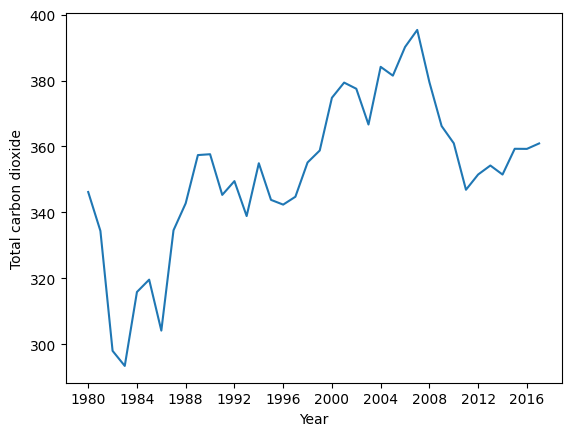

In [3]:
pyplot.xlabel('Year')
pyplot.ylabel('Total carbon dioxide')
pyplot.plot(dataframe.index, dataframe['Total carbon dioxide'])

In [4]:
# Экспоненциальное сглаживание

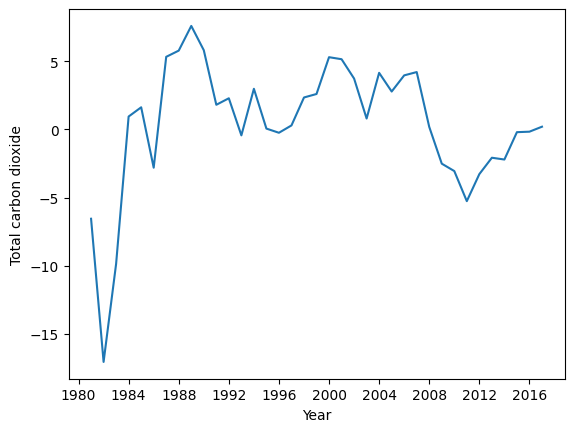

In [5]:
dataframe["Total carbon dioxide"] = dataframe["Total carbon dioxide"].ewm(alpha=0.2).mean()
dataframe = dataframe.diff(1)
dataframe.dropna(inplace=True)
data = dataframe['Total carbon dioxide']
pyplot.xlabel('Year')
pyplot.ylabel('Total carbon dioxide')
pyplot.plot(dataframe.index, dataframe['Total carbon dioxide'])

Проверка на стационарность

In [6]:
#ACF(Автокорреляционная функция)
print('ACF(Автокорреляционная функция)')
print(acf(data))
#PACF(Частичная автокорреляционная функция)
print('PACF(Частичная автокорреляционная функция)')
print(pacf(data))
#Дики-Фуллер
print("Тест Дики-Фуллера")
result = adfuller(data)
print(f"adfuller - {result[0]}\npvalue - {result[1]}\nКритические значения - {result[4]}")
if result[0] > result[4]['5%']:
    print('Ряд не стационарен, нулевая гипотеза не отклоняется') 
else:
    print("Ряд стационарен")

ACF(Автокорреляционная функция)
[ 1.00000000e+00  6.67723290e-01  2.97420880e-01  1.40254476e-01
  5.88707666e-02 -1.00908270e-01 -2.28849136e-01 -2.71599555e-01
 -2.36195804e-01 -1.33000668e-01 -4.60063374e-02 -1.24587113e-02
  9.99247202e-04  4.73019526e-02  5.85162767e-02  3.73034171e-02]
PACF(Частичная автокорреляционная функция)
[ 1.          0.68627116 -0.29592118  0.15762178 -0.10177757 -0.24867854
 -0.06770608 -0.12611144  0.00130634  0.13071799 -0.02553477 -0.02781395
 -0.04457378  0.0361581  -0.0888399   0.02171116]
Тест Дики-Фуллера
adfuller - -2.7587945702836034
pvalue - 0.06440498959929623
Критические значения - {'1%': -3.626651907578875, '5%': -2.9459512825788754, '10%': -2.6116707716049383}
Ряд не стационарен, нулевая гипотеза не отклоняется


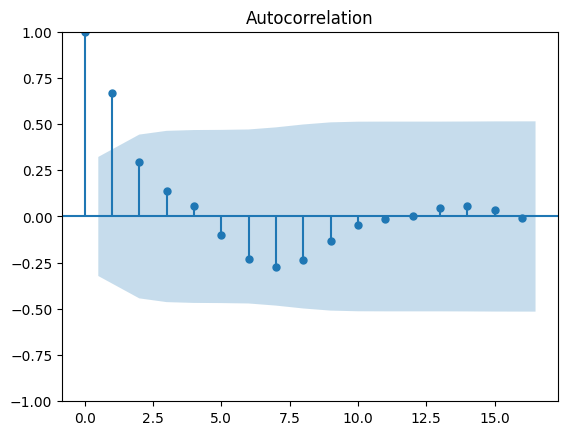

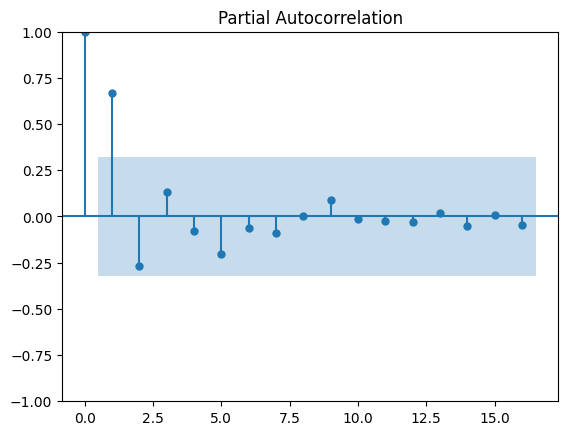

In [7]:
plot_acf(dataframe)
plot_pacf(dataframe)
pyplot.show()

Расчет описательных характеристик

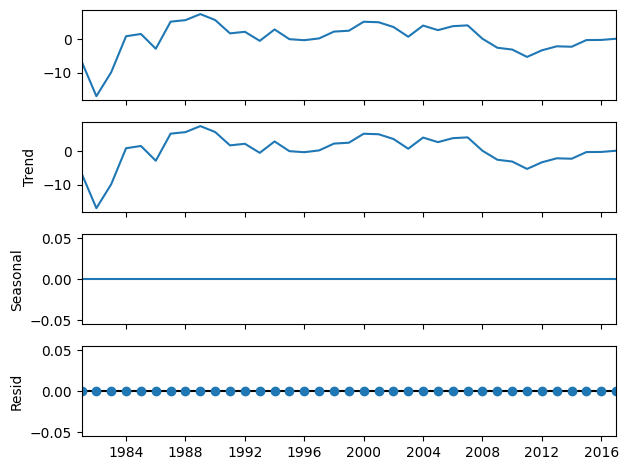

In [8]:
decompose = seasonal_decompose(dataframe)
decompose.plot()
pyplot.show()

Тенденция временного ряда

In [9]:
#Гипотеза о наличии тенденции
result = mk.original_test(data)
print(result)
if result.trend == 'increasing':
    print("В данных присутствует возрастающая тенденция")
elif result.trend == 'decreasing':
    print("В данных присутствует убывающая тенденция")
else:
    print("Во временном ряду отсутствуют тенденции")


Mann_Kendall_Test(trend='no trend', h=False, p=0.5387479615505166, z=-0.6147074157508847, Tau=-0.07207207207207207, s=-48.0, var_s=5846.0, slope=-0.05333207366081305, intercept=1.7522397769825708)
Во временном ряду отсутствуют тенденции


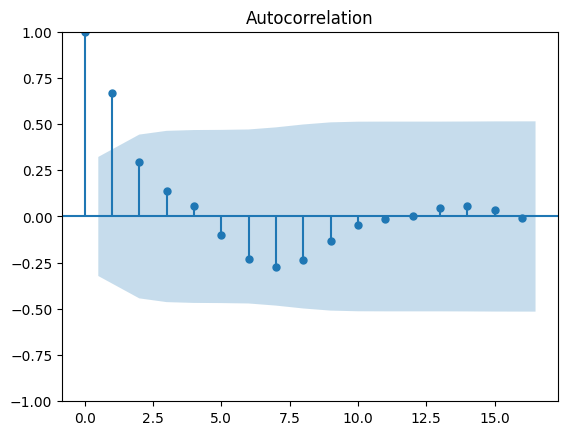

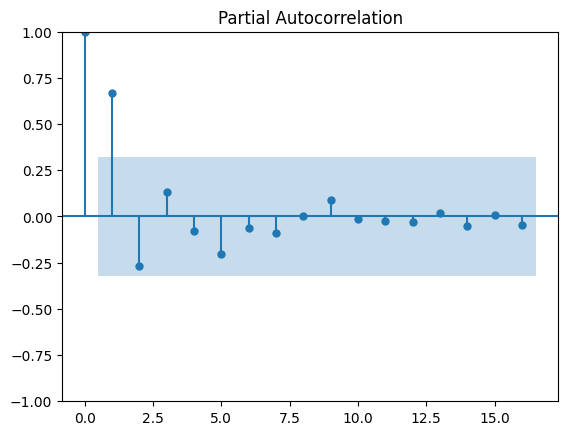

In [10]:
plot_acf(dataframe)
plot_pacf(dataframe)
pyplot.show()

In [11]:
train, test = train_test_split(data, test_size=0.25, shuffle=False)

In [12]:
print(test.index)


DatetimeIndex(['2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)


Модели авторегрессии и скользящего среднего

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


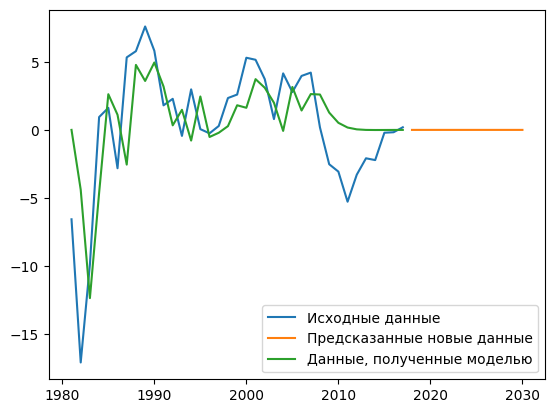

                                SARIMAX Results                                 
Dep. Variable:     Total carbon dioxide   No. Observations:                   27
Model:                 SARIMAX(2, 0, 0)   Log Likelihood                 -74.666
Date:                  Wed, 20 Sep 2023   AIC                            155.333
Time:                          12:12:01   BIC                            159.220
Sample:                      01-01-1981   HQIC                           156.488
                           - 01-01-2007                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7961      0.236      3.377      0.001       0.334       1.258
ar.L2         -0.1894      0.207     -0.915      0.360      -0.595       0.216
sigma2        14.4146      3.220    

In [13]:
# Авторегрессия
ar_model = SARIMAX(train, order=(2, 0, 0)).fit()
ar_predicted = ar_model.predict(start='2018', end='2030')
ar_predicted.columns = ['Year', 'Total carbon dioxide']
ar_new = ar_model.predict(start='1981', end='2017')
pyplot.plot(dataframe)
pyplot.plot(ar_predicted)
pyplot.plot(ar_new)
pyplot.legend(['Исходные данные', 'Предсказанные новые данные', 'Данные, полученные моделью'])
pyplot.show()
print(ar_model.summary())

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


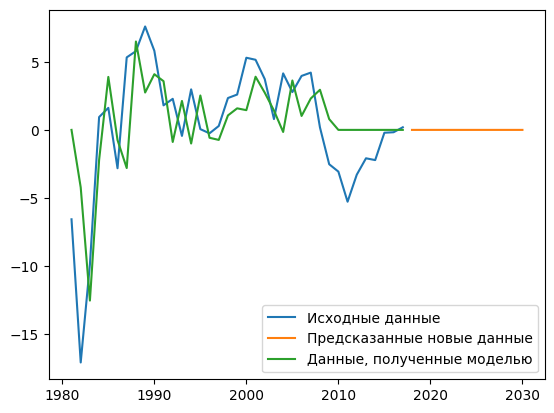

                                SARIMAX Results                                 
Dep. Variable:     Total carbon dioxide   No. Observations:                   27
Model:                 SARIMAX(0, 0, 2)   Log Likelihood                 -74.320
Date:                  Wed, 20 Sep 2023   AIC                            154.641
Time:                          12:12:02   BIC                            158.528
Sample:                      01-01-1981   HQIC                           155.797
                           - 01-01-2007                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9045      0.267      3.392      0.001       0.382       1.427
ma.L2          0.4170      0.281      1.485      0.138      -0.133       0.967
sigma2        13.9268      3.794    

In [14]:
# Скользящее среднее
ma_model = SARIMAX(train, order=(0, 0, 2)).fit()
ma_predicted = ar_model.predict(start='2018', end='2030')
ma_new = ma_model.predict(start='1981', end='2017')
#r2_score(test, train_test_split(ma_new, test_size=0.75, shuffle=False)[1])
pyplot.plot(dataframe)
pyplot.plot(ma_predicted)
pyplot.plot(ma_new)
pyplot.legend(['Исходные данные', 'Предсказанные новые данные', 'Данные, полученные моделью'])
pyplot.show()
print(ma_model.summary())

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starti

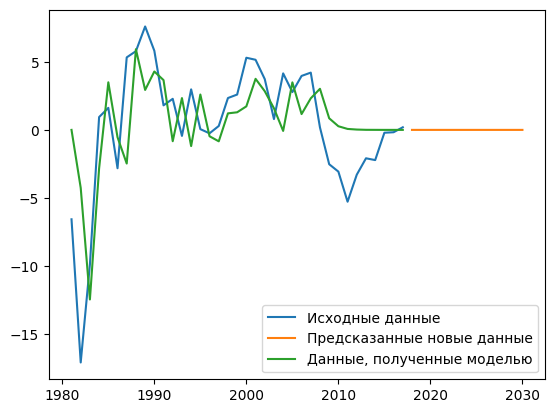

                                SARIMAX Results                                 
Dep. Variable:     Total carbon dioxide   No. Observations:                   27
Model:                 SARIMAX(2, 0, 2)   Log Likelihood                 -74.273
Date:                  Wed, 20 Sep 2023   AIC                            158.545
Time:                          12:12:02   BIC                            165.024
Sample:                      01-01-1981   HQIC                           160.472
                           - 01-01-2007                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1960      0.794     -0.247      0.805      -1.752       1.360
ar.L2          0.1441      0.554      0.260      0.795      -0.941       1.229
ma.L1          1.0745      0.839    

In [15]:
# ARMA модель
arma_model = SARIMAX(train, order=(2, 0, 2)).fit()
arma_predicted = arma_model.predict(start='2018', end='2030')
arma_new = arma_model.predict(start='1981', end='2017')
pyplot.plot(dataframe)
pyplot.plot(arma_predicted)
pyplot.plot(arma_new)
pyplot.legend(['Исходные данные', 'Предсказанные новые данные', 'Данные, полученные моделью'])
pyplot.show()
print(arma_model.summary())

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


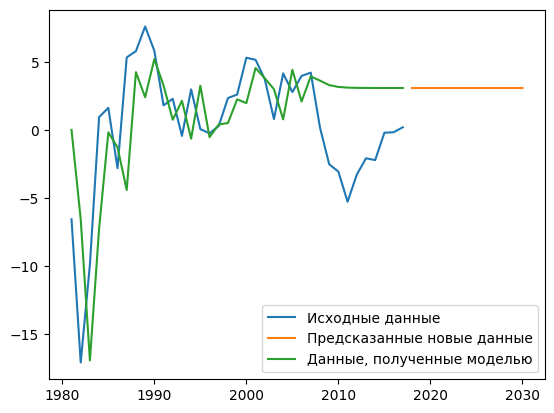

                                SARIMAX Results                                 
Dep. Variable:     Total carbon dioxide   No. Observations:                   27
Model:                 SARIMAX(2, 0, 2)   Log Likelihood                 -74.273
Date:                  Wed, 20 Sep 2023   AIC                            158.545
Time:                          12:12:03   BIC                            165.024
Sample:                      01-01-1981   HQIC                           160.472
                           - 01-01-2007                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1960      0.794     -0.247      0.805      -1.752       1.360
ar.L2          0.1441      0.554      0.260      0.795      -0.941       1.229
ma.L1          1.0745      0.839    

In [16]:
# ARIMA модель 
arima_model = SARIMAX(train, order=(2, 1, 2)).fit()
arima_predicted = arima_model.predict(start='2018', end='2030')
arima_new = arima_model.predict(start='1981', end='2017')
pyplot.plot(dataframe)
pyplot.plot(arima_predicted)
pyplot.plot(arima_new)
pyplot.legend(['Исходные данные', 'Предсказанные новые данные', 'Данные, полученные моделью'])
pyplot.show()
print(arma_model.summary())